In [1]:
from scipy.integrate import solve_bvp, odeint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from scipy import interpolate
from scipy import integrate
from pylab import *
plt.rc('font',size=15) 

In [2]:
basedir = '/Users/laote/sdsu/Research/GRR/DensityP'
mev1 = basedir + '/1mev/mass_energy_density_profiles_1MeV'
mev10 = basedir + '/10mev/mass_energy_density_profiles_10MeV'
mev25 = basedir + '/25mev/mass_energy_density_profiles_25MeV'
mev50 = basedir + '/50mev/mass_energy_density_profiles_50MeV'

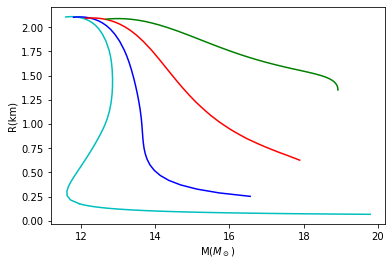

In [3]:
MR_1 = np.genfromtxt(basedir + '/outputTOV.dat__DD2_1MeV_ESC08_Deltas',skip_header=2,names='a,b,c,d,e,f,g')
MR_1l = np.genfromtxt(basedir + '/outputTOV.dat__DD2_1MeV_ESC08_lightStars_Deltas',skip_header=2,names='a,b,c,d,e,f,g')
MR_10 = np.genfromtxt(basedir + '/outputTOV.dat__DD2_10MeV_ESC08_Deltas',skip_header=2,names='a,b,c,d,e,f,g')
MR_25 = np.genfromtxt(basedir + '/outputTOV.dat__DD2_25MeV_ESC08_Deltas',skip_header=2,names='a,b,c,d,e,f,g')
MR_50 = np.genfromtxt(basedir + '/outputTOV.dat__DD2_50MeV_ESC08_Deltas',skip_header=2,names='a,b,c,d,e,f,g')
M_1 = MR_1['d']
R_1 = MR_1['e']
M_1l = MR_1l['d']
R_1l = MR_1l['e']
M_10 = MR_10['d']
R_10 = MR_10['e']
M_25 = MR_25['d']
R_25 = MR_25['e']
M_50 = MR_50['d']
R_50 = MR_50['e']
plt.plot(R_1,M_1,'c')
plt.plot(R_1l,M_1l,'c')
plt.plot(R_10,M_10,'b')
plt.plot(R_25,M_25,'r')
plt.plot(R_50,M_50,'g')
plt.xlabel('M($M_\odot$)')
plt.ylabel('R(km)')
# plt.savefig('./paper/MR_DD2.eps')
plt.show()

In [4]:
# df_1mev_10M = np.genfromtxt(mev1+'_1.0M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_1mev_12M = np.genfromtxt(mev1+'_1.2M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_1mev_14M = np.genfromtxt(mev1+'_1.4M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_1mev_16M = np.genfromtxt(mev1+'_1.6M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_1mev_18M = np.genfromtxt(mev1+'_1.8M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_1mev_20M = np.genfromtxt(mev1+'_2.0M.dat',skip_header=5,names='rd,mr,ed,nd')

# df_10mev_10M = np.genfromtxt(mev10+'_1.0M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_10mev_12M = np.genfromtxt(mev10+'_1.2M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_10mev_14M = np.genfromtxt(mev10+'_1.4M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_10mev_16M = np.genfromtxt(mev10+'_1.6M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_10mev_18M = np.genfromtxt(mev10+'_1.8M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_10mev_20M = np.genfromtxt(mev10+'_2.0M.dat',skip_header=5,names='rd,mr,ed,nd')

# df_25mev_10M = np.genfromtxt(mev25+'_1.0M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_25mev_12M = np.genfromtxt(mev25+'_1.2M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_25mev_14M = np.genfromtxt(mev25+'_1.4M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_25mev_16M = np.genfromtxt(mev25+'_1.6M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_25mev_18M = np.genfromtxt(mev25+'_1.8M.dat',skip_header=5,names='rd,mr,ed,nd')
# df_25mev_20M = np.genfromtxt(mev25+'_2.0M.dat',skip_header=5,names='rd,mr,ed,nd')

In [5]:
# M = df_1mev_16M ['mr']*1.988e33 # to gram
# R = df_1mev_16M ['rd']*100 # to cm
# rho = (3*M/(4*np.pi*R**3))
# rho

# plt.plot(df_25mev_20M['rd'][3:],df_25mev_20M['ed'][3:]*1.7827e12)
# plt.yscale('log')
# plt.show()
# plt.plot(df_25mev_20M['rd'][3:],df_25mev_20M['mr'][3:]*1.7827e12)

In [6]:
def alpha_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        # (piGrho) 3/4* gravitational constant in solar mass^-1*km^3*sec^-2 = 9.95e10
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/alpha%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        am = f(freq)
        return round(np.float(am),5)
#         return 1

def gamma_m(m,M,R,period=0): # period is in unit second
    if period == 0:
        return 1
    else:
        unit = (9.95e10*(M/R**3))**(-0.5) # in solar mass and km
        template = np.genfromtxt("./Constant/gamma%s.txt"%m,names=('x,y'))
        f = interpolate.interp1d(template['x'], template['y'])

        freq = (2*np.pi/period)*(unit)
        if freq > 0.65:
            freq = 0.65

        gm = f(freq)

        return round(np.float(gm),5)

def omega_m(m,M,R): # mass and radius (equation 16.70)
    col1 = 2*m*(m - 1)/(2*m + 1)
    col2 = 6.67e-20*M*2e30/R**3
    om = np.sqrt(col1 * col2)
    return om

In [7]:
def doublefactorial(n): 
    if (n == 0 or n == 1): 
        return 1; 
    return n * doublefactorial(n - 2);

def tau_GR_m(m,M,R): # m >= 0, solar mass, km radius
    M = 1.988e33*M
    R=R*1e5 #unit to cm
    G = 6.6743e-8 #cgs
    c = 2.99792458e10 #cgs
    col1 = ( (m-1) * (doublefactorial(2*m+1))**2 ) / ( (m+1) * (m+2) )
    col2 = ( (2*m + 1) / (2*m*(m-1)) )**m
#     col3 = 2/3 * (R/(M*1.48))**(m+1) * R/3e5
    col3 = 2/3 * (c**2*R/(G*M))**(m+1) * R/c
    tGRm = col1 * col2 * col3
    return tGRm

def tau_nu_m(m,R,nu): # radius (km), shear viscosity timescale (equaiton 16.72)
    tnum = (R*1e5)**2 / ((2*m+1)*(m-1)) / nu
    return tnum

def tau_zeta_m(m,M,R,zeta): # mass(sun mass) radius (km)
    tzetam = (0.5*(3/5)**4*(m**3/(2*m+3))*zeta/R**2)**(-1)
    return tzetam

tau_GR_m(2,1.4,12),tau_nu_m(2,12,0.01),tau_zeta_m(2,1.4,12,0.01)

(0.15300587951822162, 28800000000000.0, 194444.44444444447)

In [8]:
def ode_RK4(f, t0, tf, y0=0, n=100):
    t = np.linspace(t0,tf,n)
    y = list([y0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        k1 = h*f(t[i],y[-1])
        k2 = h*f(t[i]+h/2,y[-1]+k1/2)
        k3 = h*f(t[i]+h/2,y[-1]+k2/2)
        k4 = h*f(t[i]+h,y[-1]+k3)
        y.append(y[-1]+(k1+2*k2+2*k3+k4)/6)
    y = np.array(y)
    
    return y

def ode_shooting(F,t0,tf,y0,yf,n=100,tol=10**(-8),kmax=10):
    yp0 = float(yf-y0)/(tf-t0)
    Y0 = np.array((y0,yp0))
    Y = ode_RK4(F,t0,tf,Y0,n)
    err = Y[-1][0] - yf
    Y0[1] = yp0 - 0.1*np.sign(err)
    for k in range(kmax-1):
        Y = ode_RK4(F,t0,tf,Y0,n)
        err1 = Y[-1][0] - yf
        ddy = Y0[1] - yp0
        if abs(err1)<tol or abs(ddy)<tol:
            y = list()
            for x in Y:
                y.append(x[0])
            return np.array(y), Y0[1], err
        deddy = (err1-err)/ddy
        yp0 = Y0[1]
        err = err1
        Y0[1] = Y0[1] - err/deddy
    y = list()
    for x in Y:
        y.append(x[0])
    return np.array(y), Y0[1], err

def F(t,Y):
    const = 3.479e-12 #cm^-2
    l = 2
    R = 13*1e5 #cm
    a = const - (l+1)*(l+2)/t**2 #cm^-2
    b = 2/t #cm^-1
    c = -2*const*l/(2*l+1)*np.sqrt(l/(l+1))*(t/R)**(l+1)

    return np.array([Y[1],c-b*Y[1]-a*Y[0]])

def testfun(x):
    y = (2 *np.exp(18 - 3*x) *(-1 + np.exp(3 *x)))/(-1 + np.exp(18))
    return y

In [9]:
def NS_density(r,T='1',Mtot='1.60'): #r in cm, Mtot is mass in M_sun (string)
    basedir = '/Users/laote/sdsu/Research/GRR/DensityP'
    if T == '0':
        pro_dir = basedir + '/ACB4/mass_energy_density_profiles_ACB4' + '_%sM.dat'%(Mtot)
    else:
        pro_dir = basedir + '/%smev/mass_energy_density_profiles_%sMeV'%(T,T) + '_%sM.dat'%(Mtot)
    df = np.genfromtxt(pro_dir,skip_header=7,names='rd,mr,ed,nd')
    M = df['mr']*1.988e33 # to gram
    R = df['rd']*100 # to cm
    d = df['ed']*1.7827e12 # to gram cm-3
    pos = np.argmin(np.abs(R-r))
    m = M[pos]
    rho = d[pos]
#     func = interpolate.interp1d(R,d)
#     m = func(r)
#     rho = func(r)
#     print(d)
    
# #     m = 1.5*1.988e33
# #     r = 14e5
#     rho = (3*m/(4*np.pi*r**3))
    return rho

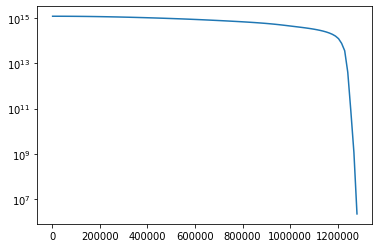

In [10]:
rr = np.linspace(1000,0.1281227E+07,100)
dd = []
for r in rr:
    dd.append(NS_density(r,'10','2.00'))
plt.plot(rr,dd)
plt.yscale('log')

In [11]:
def int_term_2(r,M=1.4,R=12.53e5,l=2,period=7.465e-4,temp=1e9,T='1',Mtot='1.60'):  # unit K
    y,yp,err = ode_shooting(F,1e-13,R,0,0,n=100)
    t = np.linspace(1e-13,R,100)
    f = interpolate.interp1d(t, y)
    d_psi = f(r)
#     d_psi = 0
    if period == 0:
        Omega = np.sqrt(9.95e10*(M/R**3))
    else:   
        Omega = 2*np.pi/period
    density = NS_density(r,T,Mtot)
    alpha = 1
    drho_dp = 2.0739e-21 #sec^2/cm^2
    drho_rho = alpha * (R)**2 * Omega**2 * drho_dp *\
               ( (2*l/(2*l+1) ) * np.sqrt(l/(l+1)) * (r/R)**(l+1) + d_psi)
    zeta = 6e-59 * ((l+1)/(2*Omega))**2 * density**2 * temp**6
    func = zeta * drho_rho**2 * r**2 * 2*np.pi
    
    return func

def int_term_2_SH(theta,l=2): #spherical, theta goes from 0 to pi/2
    if l == 2:
        y = 2*np.pi* (-1/2)*np.sqrt(15/2/np.pi) * np.sin(theta)*np.cos(theta) 
    if l == 3:
        y = 2*np.pi* (1/4)*np.sqrt(105/2/np.pi) * np.sin(theta)**2*np.cos(theta) 
    if l == 4:
        y = 2*np.pi* (-3/8)*np.sqrt(35/np.pi) * np.sin(theta)**3*np.cos(theta) 
    if l == 5:
        y = 2*np.pi* (3/16)*np.sqrt(385/2/np.pi) * np.sin(theta)**4*np.cos(theta) 
    if l == 6:
        y = 2*np.pi* (-3/32)*np.sqrt(1001/2/np.pi) * np.sin(theta)**5*np.cos(theta)   
    else:
        y = 1
    return y**2
    

def int_shear_term_2(r,M=1.4,R=12.53e5,l=2,temp=1e9,T='1',Mtot='1.60'): # unit K
    density = NS_density(r,T,Mtot)
    shear = 347 * density**(9/4) * temp**(-2)
    func = shear * r**(2*l)
    return func

def int_term_3(r,M=1.4,R=12.53,l=2,T='1',Mtot='1.60'):
    density = NS_density(r,T,Mtot)
    func = density * r**(2*l+2)
    return func


def shear_timescale(l,M,R,temp,T='1',Mtot='1.60'): # mass(sun mass) radius (km)
    R=R*1e5 #unit to cm
    int_lim = np.linspace(60,R,500)
    term2,term3 = 0,0
    for il in int_lim:
        term2 += int_shear_term_2(il,M,R,l,temp,T,Mtot)*(R-60)/100
        term3 += int_term_3(il,M,R,l,T,Mtot)*(R-60)/100

#     term2 = integrate.quad(int_shear_term_2, 60, R, args=(M,R,l))[0]
#     term3 = integrate.quad(int_term_3, 60, R, args=(M,R,l))[0]
    tzetam = (l-1)*(2*l+1) * term2 / (term3)
    return 1/tzetam
    
    
def bulk_timescale(l,M,R,period,temp,T='1',Mtot='1.60'): # mass(sun mass) radius (km)
    R=R*1e5 #unit to cm
    int_lim = np.linspace(60,R,30)
    term2,term2_SH,term3 = 0,0,0
    for il in int_lim:
        term2 += int_term_2(il,M,R,l,period,temp,T,Mtot)*(R-60)/100
        term3 += int_term_3(il,M,R,l,T,Mtot)*(R-60)/100
    
#     term2 = integrate.quad(int_term_2, 0.001, R, args=(M,R,l,period,y))[0]
#     term3 = integrate.quad(int_term_3, 0.001, R, args=(M,R,l))[0]
    term2_SH = integrate.quad(int_term_2_SH, 0, np.pi, args=(l))[0]
    tzetam = 4*(R)**(2*l-2)/(l+1)**2 * term2 * np.abs(term2_SH) * (term3)**(-1)
    return 1/tzetam
    
def epslion_m(m,M,R,period,temp,T='1',Mtot='1.60'):
#     return bulk_timescale(m,M,R,0,temp,T,Mtot)/bulk_timescale(m,M,R,period,temp,T,Mtot)
    return 1

In [12]:
def GR_timescale(l,M,R,period,T='1',Mtot='1.60'): # mass(sun mass) radius (km)
    R=R*1e5 #unit to cm
    G = 6.6743e-8 #cgs
    c = 2.99792458e10 #cgs
    if period == 0:
        Omega = np.sqrt(9.95e10*(M/R**3))
    else:   
        Omega = 2*np.pi/period
    int_lim = np.linspace(60,R,30)
    term3 = 0
    for il in int_lim:
        term3 += int_term_3(il,M,R,l,T,Mtot)*(R-60)/100   
    tzetam = -32*np.pi*G*(Omega)**(2*l+2)/(c)**(2*l+3) * (l-1)**(2*l)/(doublefactorial(2*l+1))**2 \
                * ((l+2)/(l+1))**(2*l+2) * term3
    return 1/tzetam
    
GR_timescale(2,1.6,12.8,7.465e-4),bulk_timescale(2,1.6,12.8,7.465e-4,1e9),shear_timescale(2,1.6,12.8,1e9)

(-6.7838273312539785, 16270855396.471008, 314151933.4439012)

In [13]:
grt = GR_timescale(2,1.6,12.8,0.05)
bt = bulk_timescale(2,1.6,12.8,0.05,1e9)
st = shear_timescale(2,1.6,12.8,1e9)

print(grt / st)
print(grt / bt)

-1949.7377573083977
-0.00839122118768759


In [18]:
def Omega_GRR(m,M,R,period=0,temp=1e9,T='1',Mtot='1.60'): # solar mass, km radius, sec period, K temperature
    col1 = omega_m(m,M,R)/m
    col2 = alpha_m(m,M,R,period) 
#     col_25 = tau_GR_m(m,M,R)/shear_timescale(m,M,R,temp,T,Mtot) + \
#              tau_GR_m(m,M,R)/bulk_timescale(m,M,R,period,temp,T,Mtot)*epslion_m(m,M,R,period,temp,T,Mtot)
#     col_25 = -GR_timescale(m,M,R,period,T,Mtot)/shear_timescale(m,M,R,temp,T,Mtot) + \
#              -GR_timescale(m,M,R,period,T,Mtot)/bulk_timescale(m,M,R,period,temp,T,Mtot)*epslion_m(m,M,R,period,temp,T,Mtot)
    col_25 = -GR_timescale(m,M,R,period,T,Mtot)/shear_timescale(m,M,R,temp,T,Mtot)
#     col_25 = -GR_timescale(m,M,R,period,T,Mtot)/shear_timescale(m,M,R,temp,T,Mtot)
#     const = (2*np.pi/period)**2/(np.pi*6.6743e-8*(3*M*2e30/(4*np.pi*(R*1e5)**3)))
#     if m == 2:
#         tgr,ts,tb = 3.26,2.52e8,6.99e8
#     if m == 3:
#         tgr,ts,tb = 3.11e1,1.44e8,5.13e8
#     if m == 4:
#         tgr,ts,tb = 2.85e2,1.07e8,4.01e8
#     if m == 5:
#         tgr,ts,tb = 2.37e3,8.79e7,3.26e8
#     if m == 6:
#         tgr,ts,tb = 3.26,2.52e8,6.99e8
#     col_25 = 1/( (1/tgr) * (const)**(m+1) ) * ( (1/ts) * (1e9/temp)**2 + (1/tb) * (temp/1e9)**6 * const )
    col3 = gamma_m(m,M,R,period) * (col_25)**(1/(2*m+1))
    GRR = col1 * (col2 + col3)
    return GRR #angular frequency (2pi/period)

def self_con_Omega_GRR(m,M,R,period=0,temp=1e9,T='1',Mtot='1.60'):
    p = []
    for i in range(6):
        period = 2*np.pi/Omega_GRR(m,M,R,period,temp,T,Mtot)
        p.append(period)
#     plt.figure(figsize=(10,5))
#     plt.plot(p)
#     plt.show()
    final_p = 0.5*(p[-1]+p[-2])
    return np.round(final_p,7) # in unit second

self_con_Omega_GRR(2,1.2,14,0.005,1e11)

0.0015594

In [15]:
mass = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35,\
        1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75,\
        1.8, 1.85, 1.9, 1.95, 2.0]
radius_01 = [12.647, 12.6963, 12.7369, 12.7697, 12.7951, 12.8144, 12.8292,\
             12.8369, 12.8426, 12.8426, 12.8412, 12.8298, 12.8237, 12.8003,\
             12.7872, 12.7497, 12.7169, 12.6741, 12.6095, 12.5151, 12.4016]
radius_10 = [13.6313, 13.6191, 13.6046, 13.5863, 13.566, 13.5431, 13.518,\
             13.4907, 13.4613, 13.4299, 13.3968, 13.3605, 13.3213, 13.2781,\
             13.2299, 13.1763, 13.1146, 13.0437, 12.9603, 12.8598, 12.7319]
radius_25 = [15.7991, 15.6132, 15.4545, 15.3027, 15.1593, 15.0299, 14.9058,\
          14.7851, 14.6708, 14.5625, 14.4543, 14.3499, 14.2456, 14.1415,\
          14.0341, 13.9237, 13.8072, 13.684, 13.545, 13.3872, 13.1962]
radius_50 = [18.2681, 18.4256, 18.5651, 18.6839, 18.7804, 18.8511, 18.8946,\
             18.9136, 18.8852, 18.7636, 18.4654, 17.9414, 17.3646, 16.8604,\
             16.4263, 16.0406, 15.6861, 15.3488, 15.017, 14.6758, 14.3028]
Mtot = ['1.00', '1.05', '1.10', '1.15', '1.20', '1.25', '1.30', '1.35',\
        '1.40', '1.45', '1.50', '1.55', '1.60', '1.65', '1.70', '1.75',\
        '1.80', '1.85', '1.90', '1.95', '2.00']

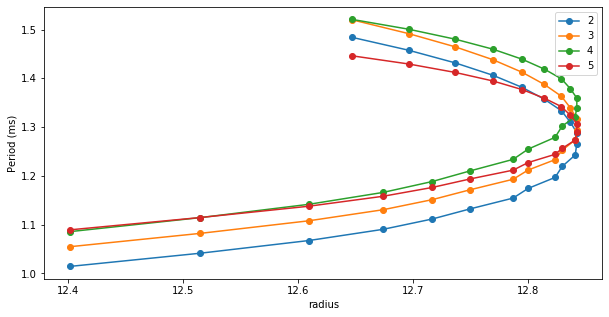

In [19]:
plt.figure(figsize=(10,5))
GRR_01 = []
for m in range(2,6):
    y_01 = []
    for i in range(len(mass)):
        result01 = self_con_Omega_GRR(m,mass[i],radius_01[i],0.005,1e10,'1',Mtot[i])*1000
        y_01.append(result01)
        GRR_01.append(result01)
    plt.plot(radius_01,y_01,'o-',label='%s'%m)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

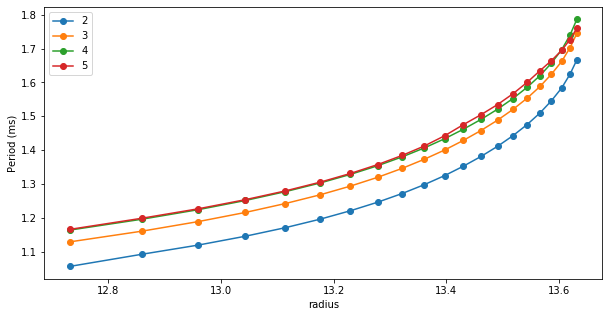

In [20]:
plt.figure(figsize=(10,5))
GRR_10 = []
for m in range(2,6):
    y_10 = []
    for i in range(len(mass)):
        y_10.append(self_con_Omega_GRR(m,mass[i],radius_10[i],0.001,1.16e11,'10',Mtot[i])*1000)
        GRR_10.append(self_con_Omega_GRR(m,mass[i],radius_10[i],0.001,1.16e11,'10',Mtot[i])*1000)
    plt.plot(radius_10,y_10,'o-',label='%s'%m)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

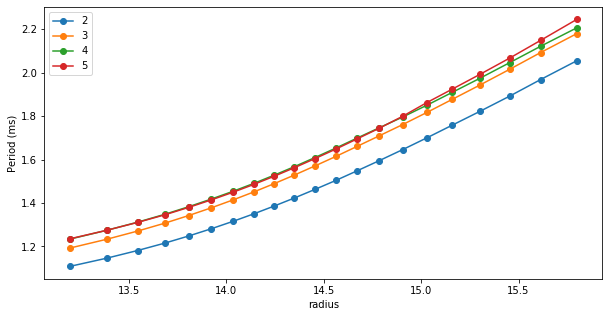

In [21]:
plt.figure(figsize=(10,5))
GRR_25 = []
for m in range(2,6):
    y_25 = []
    for i in range(len(mass)):
        y_25.append(self_con_Omega_GRR(m,mass[i],radius_25[i],0.005,2.9e11,'25',Mtot[i])*1000)
        GRR_25.append(self_con_Omega_GRR(m,mass[i],radius_25[i],0.005,2.9e11,'25',Mtot[i])*1000)
    plt.plot(radius_25,y_25,'o-',label='%s'%m)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

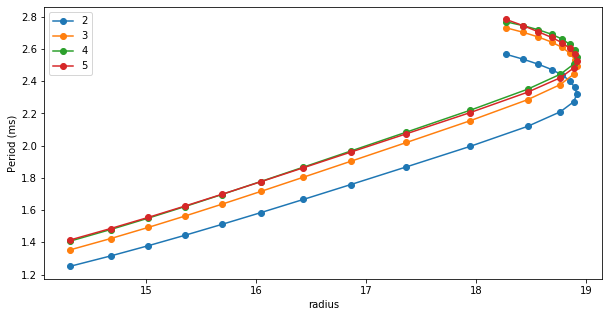

In [22]:
plt.figure(figsize=(10,5))
GRR_50 = []
for m in range(2,6):
    y_50 = []
    for i in range(len(mass)):
        y_50.append(self_con_Omega_GRR(m,mass[i],radius_50[i],0.005,5.8e11,'50',Mtot[i])*1000)
        GRR_50.append(self_con_Omega_GRR(m,mass[i],radius_50[i],0.005,5.8e11,'50',Mtot[i])*1000)
    plt.plot(radius_50,y_50,'o-',label='%s'%m)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

In [ ]:
g01 = [0.7021, 0.6962999999999999, 0.6897, 0.6824, 0.6744, 0.6663, 0.6582, 0.6495, 0.6411, 0.6325000000000001, 0.624, 0.6151000000000001, 0.6112, 0.6027, 0.5944, 0.5844999999999999, 0.5747, 0.5643999999999999, 0.5522, 0.5381, 0.5223, 0.2286, 0.22719999999999999, 0.2255, 0.22340000000000002, 0.22110000000000002, 0.2186, 0.2161, 0.2134, 0.2108, 0.208, 0.2053, 0.2024, 0.202, 0.1993, 0.1966, 0.1932, 0.1899, 0.1863, 0.1821, 0.1771, 0.1714, 0.1163, 0.1155, 0.1145, 0.1134, 0.1121, 0.1108, 0.1095, 0.1081, 0.1067, 0.1052, 0.1038, 0.1022, 0.1021, 0.1007, 0.0993, 0.0976, 0.0958, 0.094, 0.09179999999999999, 0.0892, 0.0863, 0.0773, 0.07669999999999999, 0.076, 0.0752, 0.07440000000000001, 0.07339999999999999, 0.0725, 0.07150000000000001, 0.0706, 0.0696, 0.0686, 0.0675, 0.0675, 0.0665, 0.06559999999999999, 0.0644, 0.0632, 0.062, 0.0605, 0.0588, 0.056799999999999996]
g10 = [0.0157, 0.015400000000000002, 0.015099999999999999, 0.0148, 0.0145, 0.0143, 0.014, 0.013699999999999999, 0.0135, 0.0132, 0.013, 0.012700000000000001, 0.0125, 0.0122, 0.012, 0.0117, 0.0115, 0.0112, 0.011, 0.0107, 0.0103, 0.0135, 0.0132, 0.013, 0.012700000000000001, 0.0125, 0.0123, 0.012, 0.0118, 0.011600000000000001, 0.011300000000000001, 0.0111, 0.0109, 0.0107, 0.010499999999999999, 0.0103, 0.0101, 0.0099, 0.0096, 0.0094, 0.009099999999999999, 0.0088, 0.0132, 0.013, 0.012700000000000001, 0.0125, 0.0123, 0.0121, 0.0118, 0.011600000000000001, 0.011399999999999999, 0.0112, 0.0109, 0.0107, 0.010499999999999999, 0.0103, 0.0101, 0.0099, 0.0097, 0.0095, 0.0092, 0.009000000000000001, 0.0087, 0.013600000000000001, 0.0133, 0.0131, 0.0129, 0.0126, 0.0124, 0.0121, 0.011899999999999999, 0.0117, 0.0115, 0.0112, 0.011, 0.0108, 0.0106, 0.0104, 0.0102, 0.01, 0.0097, 0.0095, 0.0092, 0.0089] 
g25 = [0.0427, 0.0412, 0.039700000000000006, 0.0379, 0.0363, 0.0351, 0.034100000000000005, 0.0336, 0.032799999999999996, 0.0317, 0.0305, 0.0295, 0.0285, 0.0277, 0.0269, 0.0262, 0.0255, 0.0248, 0.0241, 0.0234, 0.022600000000000002, 0.0589, 0.056799999999999996, 0.0547, 0.052, 0.0497, 0.0481, 0.0467, 0.046, 0.0448, 0.043300000000000005, 0.041699999999999994, 0.0402, 0.0388, 0.0376, 0.0365, 0.0356, 0.0346, 0.0336, 0.0326, 0.0317, 0.0306, 0.0753, 0.0727, 0.0698, 0.0664, 0.0634, 0.0613, 0.0596, 0.058699999999999995, 0.057, 0.055, 0.053, 0.051, 0.0492, 0.0477, 0.0463, 0.0451, 0.0438, 0.0425, 0.0413, 0.0401, 0.0387, 0.09069999999999999, 0.0876, 0.0841, 0.0799, 0.07629999999999999, 0.0738, 0.0718, 0.0707, 0.0687, 0.0663, 0.0637, 0.0613, 0.0592, 0.0573, 0.055600000000000004, 0.054200000000000005, 0.0526, 0.0511, 0.0496, 0.0482, 0.0465]
g50 = [0.0236, 0.0236, 0.0235, 0.0234, 0.023200000000000002, 0.0231, 0.0229, 0.022699999999999998, 0.0224, 0.022, 0.0213, 0.0202, 0.0189, 0.0178, 0.0167, 0.0157, 0.0149, 0.0141, 0.0133, 0.0125, 0.0117, 0.0431, 0.0431, 0.043000000000000003, 0.0428, 0.0426, 0.0423, 0.041999999999999996, 0.0415, 0.041, 0.0401, 0.0386, 0.036199999999999996, 0.0337, 0.0314, 0.0294, 0.0276, 0.0261, 0.0246, 0.0231, 0.0217, 0.0202, 0.06380000000000001, 0.064, 0.06380000000000001, 0.0636, 0.0633, 0.0629, 0.0624, 0.0618, 0.0609, 0.0594, 0.0571, 0.0535, 0.0496, 0.0461, 0.043000000000000003, 0.040299999999999996, 0.038, 0.0357, 0.0337, 0.0316, 0.0294, 0.08399999999999999, 0.0843, 0.0841, 0.0839, 0.0836, 0.08310000000000001, 0.0825, 0.0816, 0.0805, 0.0785, 0.0753, 0.07050000000000001, 0.0652, 0.0606, 0.056499999999999995, 0.052899999999999996, 0.0498, 0.046900000000000004, 0.0441, 0.0414, 0.0385]
gacb4 = [1.4629, 1.4427, 1.4241, 1.4066, 1.3902, 1.3749, 1.3606, 1.3468, 1.3338, 1.3213000000000001, 1.3093, 1.2979, 1.287, 1.2763, 1.2661, 1.2562, 1.2465, 1.2362, 1.2232, 1.2063, 1.0849, 1.0578, 1.0367, 1.0186, 1.0023, 0.9873, 0.9729, 0.959, 0.9449000000000001, 0.9304, 0.9156000000000001, 0.8995, 0.8819, 0.8611, 0.8314, 0.8270000000000001, 0.8218, 0.8151, 0.8018, 1.1797000000000002, 1.1670999999999998, 1.1554, 1.1443, 1.1340000000000001, 1.1245999999999998, 1.1158, 1.1068, 1.0984, 1.0901, 1.0822, 1.0748000000000002, 1.0675999999999999, 1.0605, 1.0537999999999998, 1.047, 1.0404, 1.0330000000000001, 1.0227000000000002, 1.0077, 0.886, 0.8593000000000001, 0.8386, 0.8210999999999999, 0.8053, 0.7908000000000001, 0.7773, 0.7639, 0.7506, 0.7366999999999999, 0.7228, 0.7075, 0.6908, 0.671, 0.6428, 0.6385, 0.6336, 0.6272, 0.6145, 0.8876, 0.8805, 0.8738, 0.8674000000000001, 0.8616, 0.8564, 0.8517, 0.8466, 0.8419, 0.8371000000000001, 0.8327, 0.8284, 0.8241999999999999, 0.8199000000000001, 0.8159000000000001, 0.8117000000000001, 0.8076, 0.8028, 0.7953, 0.7831, 0.6756000000000001, 0.6527, 0.6349, 0.6201, 0.6065, 0.5944, 0.583, 0.5716, 0.5605, 0.5487, 0.537, 0.5242, 0.5101, 0.4935, 0.4698, 0.4663, 0.4622, 0.4569, 0.4462, 0.6912, 0.6865, 0.6822, 0.6779000000000001, 0.6742, 0.6708999999999999, 0.6681, 0.6648000000000001, 0.6618999999999999, 0.6586, 0.6558999999999999, 0.653, 0.6503, 0.6475, 0.6447999999999999, 0.642, 0.6393, 0.6357999999999999, 0.6301, 0.6202, 0.5293, 0.5102, 0.4954, 0.483, 0.4718, 0.4617, 0.45239999999999997, 0.443, 0.43389999999999995, 0.4242, 0.41459999999999997, 0.4041, 0.3926, 0.379, 0.35960000000000003, 0.3568, 0.35340000000000005, 0.34909999999999997, 0.3404]


In [23]:
print(GRR_01)
print(GRR_10)
print(GRR_25)
print(GRR_50)

# print(GRR_ACB4)

[1.4841, 1.4576, 1.4316000000000002, 1.4062000000000001, 1.3813, 1.357, 1.3335000000000001, 1.3102, 1.2884, 1.2662, 1.2427, 1.2191, 1.1966999999999999, 1.1742000000000001, 1.1543, 1.1321, 1.1114, 1.0901999999999998, 1.0672, 1.0412, 1.0141, 1.5201, 1.4917, 1.4645000000000001, 1.4381000000000002, 1.4123, 1.3873, 1.3631, 1.3396000000000001, 1.3171000000000002, 1.2949000000000002, 1.2738, 1.2523, 1.2331, 1.2119, 1.1929, 1.1713, 1.1511, 1.1303999999999998, 1.1077000000000001, 1.0819, 1.0545, 1.5209, 1.5007, 1.4802000000000002, 1.4597, 1.4391, 1.4188, 1.3989, 1.3787999999999998, 1.3594, 1.34, 1.3212, 1.3018999999999998, 1.2789, 1.2548, 1.2336999999999998, 1.21, 1.1883, 1.1659000000000002, 1.1415, 1.1142, 1.0854000000000001, 1.4462, 1.4294, 1.4120000000000001, 1.3944999999999999, 1.3768, 1.3591, 1.3419, 1.3243, 1.3072, 1.2899999999999998, 1.2734, 1.2562, 1.2441, 1.2271999999999998, 1.2116, 1.1935, 1.1761, 1.158, 1.1376, 1.1144, 1.0891]
[1.6666, 1.624, 1.5839999999999999, 1.5459, 1.5098, 1.475

In [ ]:
plt.figure(figsize=(10,5))
for i in range(4):
#     plt.plot(radius_01,GRR_01[21*i:21*(i+1)],'o-',label='%s'%(i+2))
    plt.plot(radius_10,GRR_10[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.plot(radius_25,GRR_25[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.plot(radius_50,GRR_50[21*i:21*(i+1)],'-',label='%s'%(i+2))
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

In [ ]:

for i in range(4):
    plt.figure(figsize=(10,5))
    plt.plot(mass,GRR_01[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.plot(mass,GRR_10[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.plot(mass,GRR_25[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.plot(mass,GRR_50[21*i:21*(i+1)],'-',label='%s'%(i+2))
    plt.ylabel('Period (ms)')
    plt.xlabel('mass(m_sun)')
    # plt.xlim(1,1.5)
    plt.legend()
    plt.show()

# ACB4

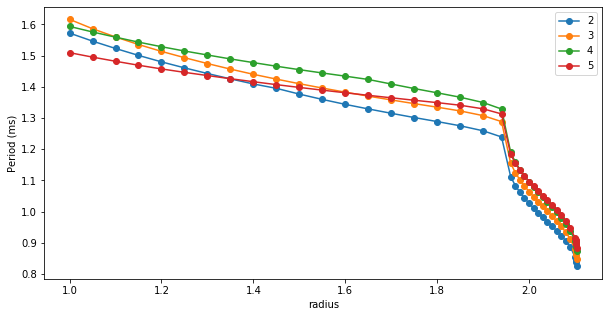

In [24]:
mass = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55,\
        1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.94, 1.96, 1.97, 1.98, 1.99,\
        2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.101,\
        2.102, 2.103, 2.1039]
radius = [13.154, 13.217, 13.281, 13.343, 13.404, 13.465, 13.525, 13.583, 13.64,\
          13.696, 13.75, 13.803, 13.855, 13.905, 13.954, 14.001, 14.047, 14.084,\
          14.095, 14.049, 13.098, 12.893, 12.736, 12.604, 12.486, 12.377, 12.273,\
          12.172, 12.069, 11.962, 11.85, 11.727, 11.589, 11.421, 11.173, 11.135,\
          11.09, 11.031, 10.913]
Mtot = ['1.0000', '1.0500', '1.1000', '1.1500', '1.2000', '1.2500', '1.3000',\
        '1.3500', '1.4000', '1.4500', '1.5000', '1.5500', '1.6000', '1.6500',\
        '1.7000', '1.7500', '1.8000', '1.8500', '1.9000', '1.9400', '1.9600',\
        '1.9700', '1.9800', '1.9900', '2.0000', '2.0100', '2.0200', '2.0300',\
        '2.0400', '2.0500', '2.0600', '2.0700', '2.0800', '2.0900', '2.1000',\
        '2.1010', '2.1020', '2.1030', '2.1039']

plt.figure(figsize=(10,5))
GRR_ACB4 = []
for m in range(2,6):
    y = []
    for i in range(len(mass)):
        y.append(self_con_Omega_GRR(m,mass[i],radius[i],0.005,1e10,'0',Mtot[i])*1000)
        GRR_ACB4.append(self_con_Omega_GRR(m,mass[i],radius[i],0.005,1e10,'0',Mtot[i])*1000)
    plt.plot(mass,y,'o-',label='%s'%m)
plt.ylabel('Period (ms)')
plt.xlabel('radius')
# plt.xlim(1,1.5)
plt.legend()
plt.show()

In [ ]:
for i in range(4):
    plt.figure(figsize=(10,5))
    plt.plot(mass,GRR_01[21*i:21*(i+1)],'-',label='%s'%(i+2))
plt.ylabel('Period (ms)')
plt.xlabel('mass')
# plt.ylim(,1.5)
plt.legend()
plt.show()

In [ ]:
mass = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35,\
        1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75,\
        1.8, 1.85, 1.9, 1.95, 2.0]
radius_01 = [12.647, 12.6963, 12.7369, 12.7697, 12.7951, 12.8144, 12.8292,\
             12.8369, 12.8426, 12.8426, 12.8412, 12.8298, 12.8237, 12.8003,\
             12.7872, 12.7497, 12.7169, 12.6741, 12.6095, 12.5151, 12.4016]
radius_10 = [13.6313, 13.6191, 13.6046, 13.5863, 13.566, 13.5431, 13.518,\
             13.4907, 13.4613, 13.4299, 13.3968, 13.3605, 13.3213, 13.2781,\
             13.2299, 13.1763, 13.1146, 13.0437, 12.9603, 12.8598, 12.7319]
radius_25 = [15.7991, 15.6132, 15.4545, 15.3027, 15.1593, 15.0299, 14.9058,\
          14.7851, 14.6708, 14.5625, 14.4543, 14.3499, 14.2456, 14.1415,\
          14.0341, 13.9237, 13.8072, 13.684, 13.545, 13.3872, 13.1962]
radius_50 = [18.2681, 18.4256, 18.5651, 18.6839, 18.7804, 18.8511, 18.8946,\
             18.9136, 18.8852, 18.7636, 18.4654, 17.9414, 17.3646, 16.8604,\
             16.4263, 16.0406, 15.6861, 15.3488, 15.017, 14.6758, 14.3028]

In [22]:
bbb = 0,4,8,12,16,20
for bb in bbb:
#     print(mass[bb])
    print('%.5s'%mass[bb],'&','%.5s'%radius_01[bb],'&','%.5s'%radius_10[bb],'&','%.5s'%radius_25[bb],'&','%.5s'%radius_50[bb],'\\\\')

1.0 & 12.64 & 13.63 & 15.79 & 18.26 \\
1.2 & 12.79 & 13.56 & 15.15 & 18.78 \\
1.4 & 12.84 & 13.46 & 14.67 & 18.88 \\
1.6 & 12.82 & 13.32 & 14.24 & 17.36 \\
1.8 & 12.71 & 13.11 & 13.80 & 15.68 \\
2.0 & 12.40 & 12.73 & 13.19 & 14.30 \\


In [44]:
mass = [1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55,\
        1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.94, 1.96, 1.97, 1.98, 1.99,\
        2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.101,\
        2.102, 2.103, 2.1039]
radius = [13.154, 13.217, 13.281, 13.343, 13.404, 13.465, 13.525, 13.583, 13.64,\
          13.696, 13.75, 13.803, 13.855, 13.905, 13.954, 14.001, 14.047, 14.084,\
          14.095, 14.049, 13.098, 12.893, 12.736, 12.604, 12.486, 12.377, 12.273,\
          12.172, 12.069, 11.962, 11.85, 11.727, 11.589, 11.421, 11.173, 11.135,\
          11.09, 11.031, 10.913]
Mtot = ['1.0000', '1.0500', '1.1000', '1.1500', '1.2000', '1.2500', '1.3000',\
        '1.3500', '1.4000', '1.4500', '1.5000', '1.5500', '1.6000', '1.6500',\
        '1.7000', '1.7500', '1.8000', '1.8500', '1.9000', '1.9400', '1.9600',\
        '1.9700', '1.9800', '1.9900', '2.0000', '2.0100', '2.0200', '2.0300',\
        '2.0400', '2.0500', '2.0600', '2.0700', '2.0800', '2.0900', '2.1000',\
        '2.1010', '2.1020', '2.1030', '2.1039']

bbb = 25,27,30,34,37
for bb in bbb:
    print('%.5s'%mass[bb],'&','%.5s'%radius[bb],'\\\\')

2.01 & 12.37 \\
2.03 & 12.17 \\
2.06 & 11.85 \\
2.1 & 11.17 \\
2.103 & 11.03 \\


In [22]:
Mtot[8]

'1.40'

In [23]:
TTT = np.logspace(6,11,200)
aaa = []
aaa_10M = []
aaa_14M = []
# aaa_16M = []
aaa_18M = []
aaa_20M = []
aaa_21M = []
for TT in TTT:
    aaa_14M.append(self_con_Omega_GRR(2,mass[8],radius_01[8],0.005,TT,'1',Mtot=Mtot[8])*1000)
    aaa_10M.append(self_con_Omega_GRR(2,mass[0],radius_01[0],0.005,TT,'1',Mtot=Mtot[0])*1000)
#     aaa_16M.append(self_con_Omega_GRR(2,mass[12],radius[12],0.005,TT,'0',Mtot=Mtot[12])*1000)
    aaa_18M.append(self_con_Omega_GRR(2,mass[16],radius_01[16],0.005,TT,'1',Mtot=Mtot[16])*1000)
    aaa_20M.append(self_con_Omega_GRR(2,mass[20],radius_01[20],0.005,TT,'1',Mtot=Mtot[20])*1000)
#     aaa_21M.append(self_con_Omega_GRR(2,mass[34],radius[34],0.005,TT,'0',Mtot=Mtot[34])*1000)

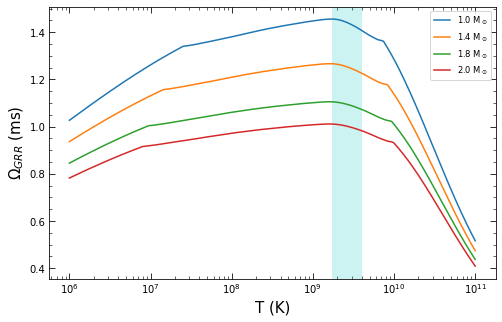

In [26]:
fs=15
plt.figure(figsize=(8,5))
plt.axvline(2.6e9,linewidth=30,color='c',alpha=0.2)
# plt.plot(TTT,ddd_14M,label='DD2 1.4 M$_\odot$')
plt.plot(TTT,aaa_10M,label='1.0 M$_\odot$')
plt.plot(TTT,aaa_14M,label='1.4 M$_\odot$')
# plt.plot(TTT,aaa_16M,label='1.6 M$_\odot$')
plt.plot(TTT,aaa_18M,label='1.8 M$_\odot$')
plt.plot(TTT,aaa_20M,label='2.0 M$_\odot$')
# plt.plot(TTT,aaa_21M,label='2.1 M$_\odot$')
plt.xscale('log')
minorticks_on()
tick_params(which='both',top='on',bottom='on',left='on',right='on')
tick_params(which='major',direction='in',length=6)
tick_params(which='minor',direction='in',length=3)
plt.ylabel('$\Omega_{GRR}$ (ms)',fontsize=fs)
plt.xlabel('T (K)',fontsize=fs)
plt.legend(fontsize='small')
plt.savefig('./paper/GRR_ACB4_Temprel.png')
plt.show()

In [30]:
print(aaa_10M)
# print(aaa)
print(aaa_14M)
print(aaa_18M)
print(aaa_20M)

[1.0267, 1.0330000000000001, 1.0394, 1.0457, 1.052, 1.0583, 1.0646, 1.0708, 1.0771000000000002, 1.0833, 1.0895, 1.0957000000000001, 1.1019, 1.108, 1.1141, 1.1202, 1.1263, 1.1322999999999999, 1.1383999999999999, 1.1443, 1.1502999999999999, 1.1562000000000001, 1.1621, 1.168, 1.1739000000000002, 1.1797000000000002, 1.1855, 1.1911999999999998, 1.1969, 1.2026000000000001, 1.2083000000000002, 1.2139, 1.2195, 1.2249999999999999, 1.2305000000000001, 1.236, 1.2413999999999998, 1.2468, 1.2522, 1.2574999999999998, 1.2628, 1.268, 1.2731999999999999, 1.2784, 1.2834999999999999, 1.2885, 1.2936, 1.2986, 1.3034999999999999, 1.3084, 1.3133000000000001, 1.3181, 1.3229, 1.3276, 1.3323, 1.3369, 1.3411, 1.3417999999999999, 1.3428, 1.3442, 1.3457000000000001, 1.3472, 1.3488, 1.3504999999999998, 1.3520999999999999, 1.3536, 1.3554000000000002, 1.3573000000000002, 1.3592000000000002, 1.361, 1.3628, 1.3647, 1.3666, 1.3684999999999998, 1.3703999999999998, 1.3722, 1.3741, 1.3759, 1.3777, 1.3796, 1.381400000000000